# MAT281 - Laboratorio N°03



<a id='p1'></a>
## I.- Problema 01


<img src="https://freedesignfile.com/upload/2013/06/Car-logos-1.jpg" width="360" height="360" align="center"/>


El conjunto de datos se denomina `vehiculos_procesado_con_grupos.csv`, el cual contine algunas de las características más importante de un vehículo.

En este ejercicio se tiene como objetivo, es poder clasificar los distintos vehículos basados en las cracterísticas que se presentan a continuación. La dificultad de este ejercicio radíca en que ahora tenemos variables numéricas y variables categóricas.

Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","vehiculos_procesado_con_grupos.csv"), sep=",")\
       .drop(
            ["fabricante", 
             "modelo",
             "transmision", 
             "traccion", 
             "clase", 
             "combustible",
             "consumo"], 
    
          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

### 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables numéricas a categóricas ocupando el comando **get_dummies** de pandas ([refrenecia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**. 


# 1.-

In [3]:
#1 Creacion del conjunto de datos con variables numericas
df_numero=df.drop(['clase_tipo','traccion_tipo','transmision_tipo','combustible_tipo','tamano_motor_tipo','consumo_tipo','co2_tipo'],axis=1)
df_numero.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,1984,2.5,4.0,522.764706,0.222671
1,1984,4.2,6.0,683.615385,0.291185
2,1985,2.5,4.0,555.437500,0.236588
3,1985,4.2,6.0,683.615385,0.291185
4,1987,3.8,6.0,555.437500,0.236588


In [4]:
#1 Rellenar con promedio
promedio=df_numero.mean()
for i in df_numero.columns:
    df_numero[i]=df_numero[i].fillna(promedio[i])
df_numero.isna().sum()

year                    0
desplazamiento          0
cilindros               0
co2                     0
consumo_litros_milla    0
dtype: int64

In [5]:
#1 Minmaxscaler
scaler = MinMaxScaler()
columns = ['year', 'desplazamiento', 'cilindros', 'co2', 'consumo_litros_milla']
df_numero[columns] = scaler.fit_transform(df_numero[columns])
df_numero.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,0.000000,0.243590,0.142857,0.398014,0.331027
1,0.000000,0.461538,0.285714,0.527672,0.475113
2,0.029412,0.243590,0.142857,0.424351,0.360294
3,0.029412,0.461538,0.285714,0.527672,0.475113
4,0.088235,0.410256,0.285714,0.424351,0.360294


# 2.-

In [6]:
#creacion variables categoricas
df_categorica=df.drop(['year', 'desplazamiento', 'cilindros', 'co2', 'consumo_litros_milla'],axis=1)
df_categorica.head()

,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo
0,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto
1,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto
2,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto
3,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto
4,Coches Medianos,dos,Automatica,Premium,grande,alto,alto


In [7]:
#cambiar de variable categorica a numerica
df_categorica_procesado=pd.get_dummies(df_categorica,prefix=['clase_tipo','traccion_tipo','transmision_tipo','combustible_tipo','tamano_motor_tipo','consumo_tipo','co2_tipo'])
#la codificacion entrega una variable binaria que representa la mayoria de los datos encontrados diferentes
df_categorica_procesado.head()
df_categorica_procesado=df_categorica_procesado.astype('float64')
df_categorica_procesado.dtypes
df_categorica_procesado.head()

,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,traccion_tipo_cuatro,traccion_tipo_dos,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# 3.-

In [8]:
df_procesado=pd.concat([df_numero,df_categorica_procesado],axis=1,join='inner')
df_procesado.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.000000,0.243590,0.142857,0.398014,0.331027,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.000000,0.461538,0.285714,0.527672,0.475113,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.029412,0.243590,0.142857,0.424351,0.360294,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.029412,0.461538,0.285714,0.527672,0.475113,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.088235,0.410256,0.285714,0.424351,0.360294,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de 8 clusters.
2. Calcular los cluster y el valor de los centroides.
3. Realizar que resumas las principales cualidades de cada cluster. Para  cada cluster calcule:

    a. Valor promedio de las variables numérica.\
    b. Moda para las variables numericas
    
    

# 1 y 2.-

In [14]:
#1 ajuste del modelo kmeans
kmeans = KMeans(n_clusters=8)
kmeans.fit(df_procesado)


centroids = kmeans.cluster_centers_ # centros 
clusters = kmeans.labels_ # clusters

In [15]:
# etiquetar los datos con los clusters encontrados
df_procesado_anterior=df_procesado
df_procesado["cluster"] = clusters
df_procesado["cluster"] = df_procesado["cluster"].astype('category')
centroids_df_procesado = pd.DataFrame(centroids, columns=df_procesado_anterior.columns)
centroids_df_procesado["cluster"] = [1,2,3,4,5,6,7,8]

In [16]:
#calculo
print(df_procesado['cluster'])

0        4
1        2
2        4
3        2
4        4
        ..
36786    3
36787    3
36788    7
36789    3
36790    7
Name: cluster, Length: 36791, dtype: category
Categories (8, int64): [0, 1, 2, 3, 4, 5, 6, 7]


# 3.-

In [29]:
df_procesado.groupby(['cluster']).mean().head(8)

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.408220,0.334073,0.258289,0.354263,0.281382,0.178058,0.084020,0.093715,0.135886,0.182097,...,0.000000,0.030215,0.964291,0.000323,0.005170,0.001454,0.000646,0.997899,0.000000,0.000000
1,0.448695,0.236570,0.176590,0.304245,0.226326,0.091693,0.105337,0.041533,0.151485,0.358146,...,0.000000,0.985955,0.000000,0.000000,0.014045,0.000000,0.989567,0.010233,0.000000,0.000201
2,0.412029,0.576144,0.420152,0.506926,0.449643,0.333848,0.003789,0.035644,0.038591,0.138647,...,0.040275,0.000000,0.009122,0.950603,0.000000,0.000982,0.000000,0.000000,0.999018,0.000000
3,0.690408,0.180711,0.151379,0.240315,0.156763,0.000000,0.111801,0.027692,0.182971,0.546325,...,0.000000,0.000776,0.000259,0.000000,0.998965,0.000000,0.018375,0.000518,0.000000,0.981108
4,0.478341,0.450961,0.327433,0.410032,0.343311,0.304922,0.017047,0.041338,0.048370,0.150437,...,0.958662,0.000000,0.040486,0.000852,0.000000,0.991690,0.000639,0.000639,0.007032,0.000000
5,0.586260,0.362143,0.299692,0.354258,0.282449,0.001521,0.083904,0.086946,0.190875,0.559442,...,0.000507,0.021800,0.977693,0.000000,0.000000,0.023321,0.000000,0.976679,0.000000,0.000000
6,0.695747,0.279320,0.234396,0.304945,0.227603,0.002089,0.070175,0.053885,0.154135,0.639515,...,0.000000,0.959900,0.000000,0.000000,0.040100,0.000000,0.985798,0.011696,0.000000,0.002506
7,0.438150,0.159590,0.141223,0.242291,0.156497,0.016407,0.125139,0.006396,0.092881,0.709677,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.002781,0.001390,0.000000,0.995829


In [27]:
df_procesado.groupby(['cluster']).apply(lambda x: x.mode()).head(8)

year  desplazamiento  cilindros       co2  \
cluster                                                    
0       0  0.000000        0.307692   0.285714  0.374603   
1       0  0.000000        0.179487   0.142857  0.317749   
2       0  0.000000        0.564103   0.428571  0.454199   
3       0  0.970588        0.179487   0.142857  0.275108   
4       0  0.029412        0.474359   0.285714  0.424351   
5       0  0.617647        0.307692   0.285714  0.374603   
6       0  0.941176        0.307692   0.285714  0.317749   
        1  0.970588             NaN        NaN       NaN   

           consumo_litros_milla  clase_tipo_Camionetas  \
cluster                                                  
0       0              0.305011                    0.0   
1       0              0.241830                    0.0   
2       0              0.393464                    0.0   
3       0              0.194444                    0.0   
4       0              0.331027                    0.0   
5       0              0.281734                    0.0   
6       0              0.241830                    0.0   
        1                   NaN                    NaN   

           clase_tipo_Coche Familiar  clase_tipo_Coches Grandes  \
cluster                                                           
0       0                        0.0                        0.0   
1       0                        0.0                        0.0   
2       0                        0.0                        0.0   
3       0                        0.0                        0.0   
4       0                        0.0                        0.0   
5       0                        0.0                        0.0   
6       0                        0.0                        0.0   
        1                        NaN                        NaN   

           clase_tipo_Coches Medianos  clase_tipo_Coches pequeños  ...  \
cluster                                                            ...   
0       0                         0.0                         0.0  ...   
1       0                         0.0                         0.0  ...   
2       0                         0.0                         0.0  ...   
3       0                         0.0                         1.0  ...   
4       0                         0.0                         0.0  ...   
5       0                         0.0                         1.0  ...   
6       0                         0.0                         1.0  ...   
        1                         NaN                         NaN  ...   

           consumo_tipo_bajo  consumo_tipo_moderado  consumo_tipo_muy alto  \
cluster                                                                      
0       0                0.0                    1.0                    0.0   
1       0                1.0                    0.0                    0.0   
2       0                0.0                    0.0                    1.0   
3       0                0.0                    0.0                    0.0   
4       0                0.0                    0.0                    0.0   
5       0                0.0                    1.0                    0.0   
6       0                1.0                    0.0                    0.0   
        1                NaN                    NaN                    NaN   

           consumo_tipo_muy bajo  co2_tipo_alto  co2_tipo_bajo  \
cluster                                                          
0       0                    0.0            0.0            0.0   
1       0                    0.0            0.0            1.0   
2       0                    0.0            0.0            0.0   
3       0                    1.0            0.0            0.0   
4       0                    0.0            1.0            0.0   
5       0                    0.0            0.0            0.0   
6       0                    0.0            0.0            1.0   
        1                    NaN            Na

### 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una ve realizado el gráfico, saque sus propias conclusiones del caso.


In [18]:
# implementación de la regla del codo
Nc = [5,10,20,30,50,75,100,200,300]
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df_procesado).inertia_ for i in range(len(kmeans))]


df_Elbow = pd.DataFrame({'Number of Clusters':Nc,
                        'Score':score})

df_Elbow.head()

,Number of Clusters,Score
0,5,125019.617469
1,10,83454.668079
2,20,66504.292523
3,30,56931.662156
4,50,45635.536219


<AxesSubplot:title={'center':'Elbow Curve'}, xlabel='Number of Clusters', ylabel='Score'>

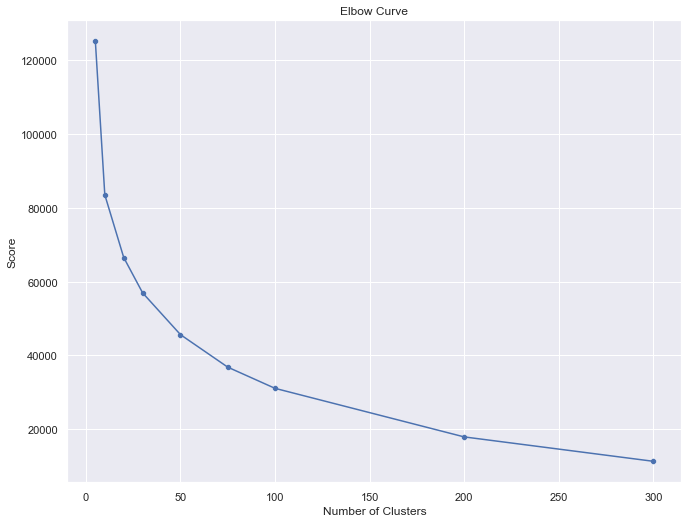

In [19]:
# graficar los datos etiquetados con k-means
fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters",
             y="Score",
            data=df_Elbow)
sns.scatterplot(x="Number of Clusters",
             y="Score",
             data=df_Elbow)

Conculimos que en el n_cluster=20 se genera la inclinación de la curva (regla del codo)

## II.- Problema 02

<img src="https://live.staticflickr.com/7866/47075467621_85ab810139_c.jpg" align="center"/>

Para el conjunto de datos de **Iris**, se pide realizar una reducción de dimensionalidad ocupando las técnicas de PCA y TSNE (vistas en clases). 

El objetivo es aplicar ambos algoritmos de la siguiente manera:

* Análisis detallado algoritma PCA (tablas, gráficos, etc.)
* Análisis detallado algoritma TSNE (tablas, gráficos, etc.)
* Comparar ambos algoritmos (conclusiones del caso)

In [39]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [40]:
dataset = load_iris()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'

iris = pd.DataFrame(
    dataset.data,
    columns=features)

iris[target] = dataset.target
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# PCA

In [41]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(iris)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [44]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = iris.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4','PC5']
)

,sepal_length,sepal_width,petal_length,petal_width,species
PC1,0.444863,-0.233369,0.506043,0.496894,0.494624
PC2,0.381980,0.920972,0.028717,0.070637,-0.009368
PC3,-0.750625,0.287249,-0.028337,0.385446,0.452414
PC4,-0.141201,-0.003513,0.243058,0.612583,-0.738725
PC5,0.269839,-0.121757,-0.826569,0.473583,0.069756


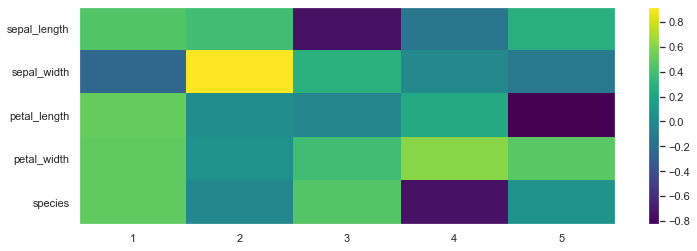

In [46]:
# Heatmap componentes
# ==============================================================================
plt.figure(figsize=(12,4))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(iris.columns)), iris.columns)
plt.xticks(range(len(iris.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

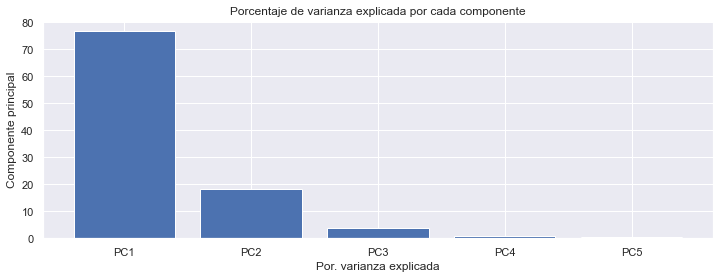

In [48]:
# graficar varianza por componente
percent_variance = np.round(modelo_pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,6), height=percent_variance, tick_label=columns)
plt.xticks(np.arange(modelo_pca.n_components_) + 1)

plt.ylabel('Componente principal')
plt.xlabel('Por. varianza explicada')
plt.title('Porcentaje de varianza explicada por cada componente')
plt.show()

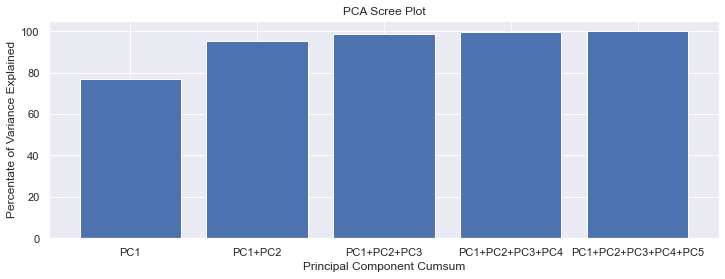

In [49]:
# graficar varianza por la suma acumulada de los componente
percent_variance_cum = np.cumsum(percent_variance)
columns = ['PC1', 'PC1+PC2', 'PC1+PC2+PC3', 'PC1+PC2+PC3+PC4','PC1+PC2+PC3+PC4+PC5']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,6), height=percent_variance_cum, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

In [51]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=iris)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5'],
    index   = iris.index
)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.576120,0.474499,-0.054364,-0.103224,0.032274
1,-2.415322,-0.678092,-0.203080,-0.064962,0.107023
2,-2.659333,-0.348282,0.112681,-0.046176,0.032555
3,-2.601991,-0.603306,0.134288,-0.000629,-0.066072
4,-2.683744,0.640220,0.102711,-0.086924,-0.028450


In [53]:
# Recostruccion de las proyecciones
# ==============================================================================
recostruccion = pca_pipe.inverse_transform(X=proyecciones)
recostruccion = pd.DataFrame(
                    recostruccion,
                    columns = iris.columns,
                    index   = iris.index
)
print('------------------')
print('Valores originales')
print('------------------')
display(recostruccion.head())

print('---------------------')
print('Valores reconstruidos')
print('---------------------')
display(iris.head())

------------------
Valores originales
------------------


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,2.220446e-16
1,4.9,3.0,1.4,0.2,1.110223e-16
2,4.7,3.2,1.3,0.2,0.000000e+00
3,4.6,3.1,1.5,0.2,1.110223e-16
4,5.0,3.6,1.4,0.2,-2.220446e-16


---------------------
Valores reconstruidos
---------------------


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [59]:
# PCA
scaler = StandardScaler()

X = iris.drop(columns='species')
y = iris['species']
    
embedding = PCA(n_components=2)
X_transform = embedding.fit_transform(X)
    
df_pca = pd.DataFrame(X_transform,columns = ['Score1','Score2'])
df_pca['species'] = y

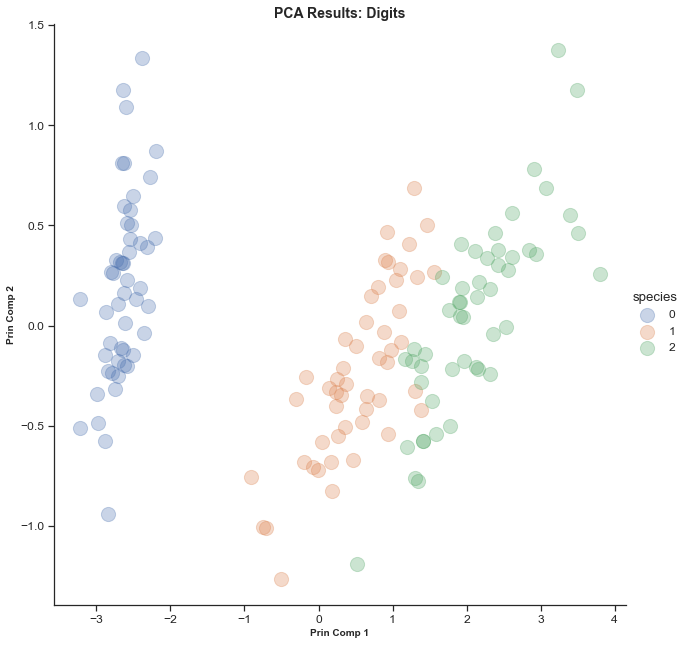

In [60]:
# Plot Digits PCA


# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x='Score1',
           y='Score2',
           data=df_pca,
           fit_reg=False,
           legend=True,
           height=9,
           hue='species',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('PCA Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Prin Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Prin Comp 2', weight='bold').set_fontsize('10')

# t-SNE

In [55]:
# tsne
scaler = StandardScaler()

X = iris.drop(columns='species')
y = iris['species']
    
embedding = TSNE(n_components=2)
X_transform = embedding.fit_transform(X)
    
df_tsne = pd.DataFrame(X_transform,columns = ['_DIM_1_','_DIM_2_'])
df_tsne['species'] = y

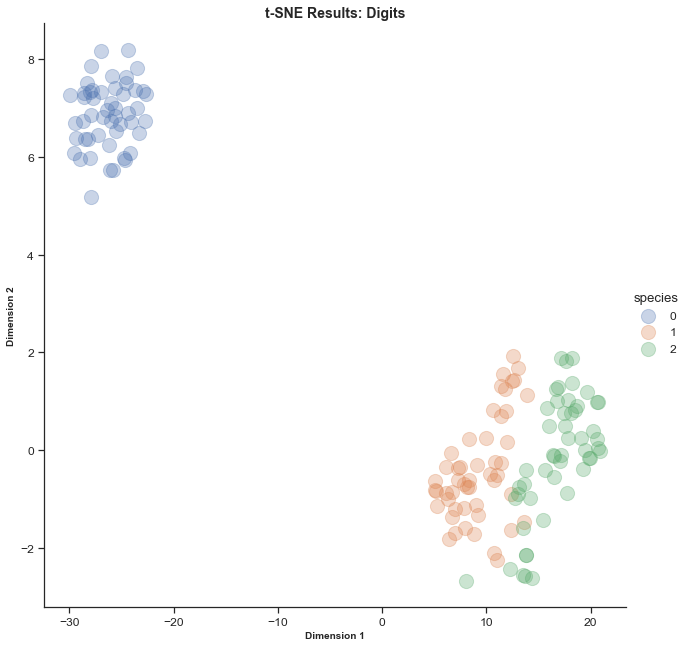

In [57]:
# Plot Digits t-SNE
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='_DIM_1_',
           y='_DIM_2_',
           data=df_tsne,
           fit_reg=False,
           legend=True,
           height=9,
           hue='species',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('t-SNE Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')

Conclusion: En comparación con los 2 modelos, el modelo TSNE se observa una mayor diferenciación entre los grupos con respecto al modelo PCA